# Análise de Sentimentos e Temas em Tweets sobre Política Brasileira durante as Eleições de 2018

O presente estudo explorou um conjunto de dados de tweets coletados durante as eleições brasileiras de 2018, com o objetivo de analisar o sentimento do público em relação aos candidatos e os principais temas de discussão. Através de técnicas de Processamento de Linguagem Natural (PLN), o estudo buscou identificar padrões de sentimento (positivo, negativo e neutro) nos tweets, bem como os tópicos mais relevantes abordados pelos usuários.

# Limpeza e Pré-processamento do Texto

## Importando as Bibliotecas Necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

# Baixando recursos do NLTK (se ainda não tiver)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Carregando modelo do spaCy para lematização
nlp = spacy.load("pt_core_news_sm")  # Para português

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alanf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alanf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alanf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Carregando o Dataset

In [2]:
df = pd.read_csv("Tweets.csv", sep=None, engine="python")

# Verificando os primeiros tweets
df.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1038992008461930496,Esquerda e direita empatam na Suécia; ultranac...,Mon Sep 10 03:26:13 +0000 2018,Neutro,veja
1,1038873557902782465,Ao vivo: Estadão e TV Gazeta realizam terceiro...,Sun Sep 09 19:35:32 +0000 2018,Neutro,veja
2,1038869931398516736,FOTOS: Apoiadores de Jair Bolsonaro realizam a...,Sun Sep 09 19:21:07 +0000 2018,Neutro,veja
3,1038867128886198273,Barroso ameaça barrar propaganda se PT insisti...,Sun Sep 09 19:09:59 +0000 2018,Neutro,veja
4,1038859914339409920,Serena Williams é multada pelo comportamento d...,Sun Sep 09 18:41:19 +0000 2018,Neutro,veja


## Função para Limpeza do Texto

In [4]:
def preprocess_text(text):
    # 1. Converter para minúsculas
    text = text.lower()
    
    # 2. Remover URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    
    # 3. Remover menções (@usuário)
    text = re.sub(r"@\w+", "", text)
    
    # 4. Remover hashtags (mantendo a palavra sem #)
    text = re.sub(r"#", "", text)
    
    # 5. Remover números
    text = re.sub(r"\d+", "", text)
    
    # 6. Remover pontuações e caracteres especiais
    text = re.sub(r"[^\w\s]", "", text)
        
    # 7. Tokenização (dividir em palavras)
    tokens = word_tokenize(text, language="portuguese")
    
    # 8. Remover stopwords (palavras irrelevantes)
    stop_words = set(stopwords.words("portuguese"))
    tokens = [word for word in tokens if word not in stop_words]
    
    # 9. Aplicar stemming (radicalização das palavras) - Ex: "correndo" → "corr"
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # 10. Aplicar lematização (forma base da palavra) - Ex: "correndo" → "correr"
    lemmatized_tokens = [nlp(word)[0].lemma_ for word in tokens]

    # 11. Reunir tokens processados em uma string
    return " ".join(lemmatized_tokens)

# Aplicando a função a cada tweet
df["clean_tweet"] = df["tweet_text"].astype(str).apply(preprocess_text)

# Verificando os resultados
df[["tweet_text", "clean_tweet"]].head()

,tweet_text,clean_tweet
0,Esquerda e direita empatam na Suécia; ultranac...,esquerdo direita empatar suécer ultranacionali...
1,Ao vivo: Estadão e TV Gazeta realizam terceiro...,vivo estadão tv gazeta realizar terceiro debat...
2,FOTOS: Apoiadores de Jair Bolsonaro realizam a...,foto apoiador jair Bolsonaro realizar ato paí
3,Barroso ameaça barrar propaganda se PT insisti...,barroso ameaçar barrar propagandar pt insistir...
4,Serena Williams é multada pelo comportamento d...,sereno William multar comportamento durant fin...


# Análise Exploratória (EDA)

## Distribuição dos Sentimentos

In [5]:
"""# Contagem dos sentimentos
plt.figure(figsize=(8, 5))
sns.countplot(x=df["sentiment"], palette="viridis")
plt.title("Distribuição dos Sentimentos nos Tweets", fontsize=14)
plt.xlabel("Sentimento")
plt.ylabel("Número de Tweets")
plt.show()"""

'# Contagem dos sentimentos\nplt.figure(figsize=(8, 5))\nsns.countplot(x=df["sentiment"], palette="viridis")\nplt.title("Distribuição dos Sentimentos nos Tweets", fontsize=14)\nplt.xlabel("Sentimento")\nplt.ylabel("Número de Tweets")\nplt.show()'

## Criar uma Nuvem de Palavras (WordCloud)

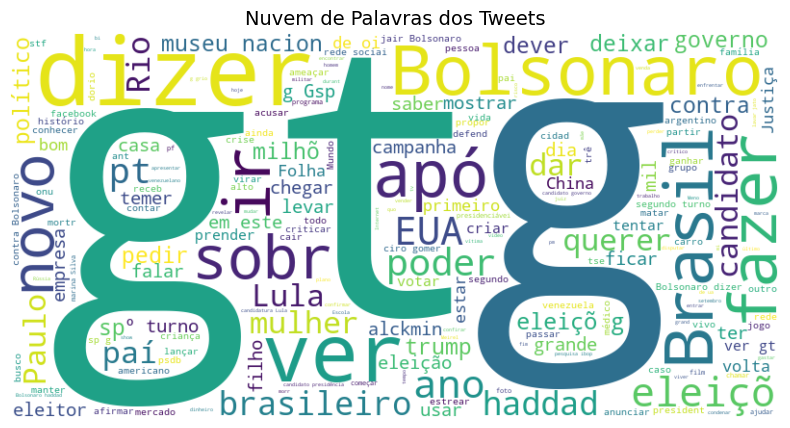

In [6]:
# Juntar todos os tweets em um único texto
all_words = " ".join(df["clean_tweet"])

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(all_words)

# Mostrar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras dos Tweets", fontsize=14)
plt.show()

## Extrair as Hashtags Mais Usadas

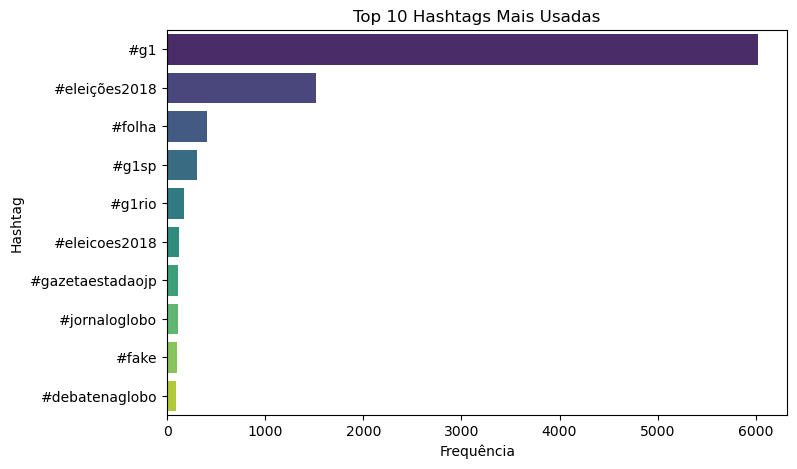

In [7]:
# Função para extrair hashtags
def extract_hashtags(text):
    return re.findall(r"#\w+", text)

# Aplicar a função em todos os tweets
hashtags = df["tweet_text"].astype(str).apply(extract_hashtags)

# Flatten da lista de listas
hashtags = [tag.lower() for sublist in hashtags for tag in sublist]

# Contar as hashtags mais comuns
top_hashtags = Counter(hashtags).most_common(10)

# Criar gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=[h[1] for h in top_hashtags], y=[h[0] for h in top_hashtags], palette="viridis")
plt.xlabel("Frequência")
plt.ylabel("Hashtag")
plt.title("Top 10 Hashtags Mais Usadas")
plt.show()

## Identificar Usuários Mais Mencionados (@usuário)

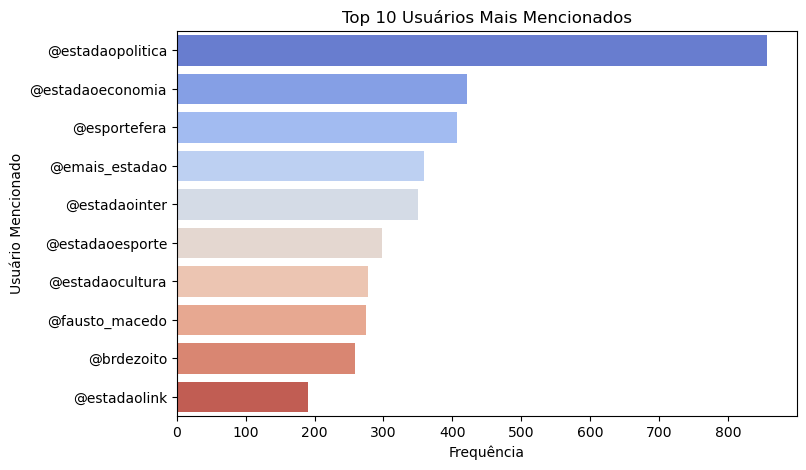

In [8]:
# Função para extrair menções
def extract_mentions(text):
    return re.findall(r"@\w+", text)

# Aplicar a função nos tweets
mentions = df["tweet_text"].astype(str).apply(extract_mentions)

# Flatten da lista de listas
mentions = [mention.lower() for sublist in mentions for mention in sublist]

# Contar as menções mais comuns
top_mentions = Counter(mentions).most_common(10)

# Criar gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=[m[1] for m in top_mentions], y=[m[0] for m in top_mentions], palette="coolwarm")
plt.xlabel("Frequência")
plt.ylabel("Usuário Mencionado")
plt.title("Top 10 Usuários Mais Mencionados")
plt.show()

## Contagem das Fontes de Consulta (query_used)

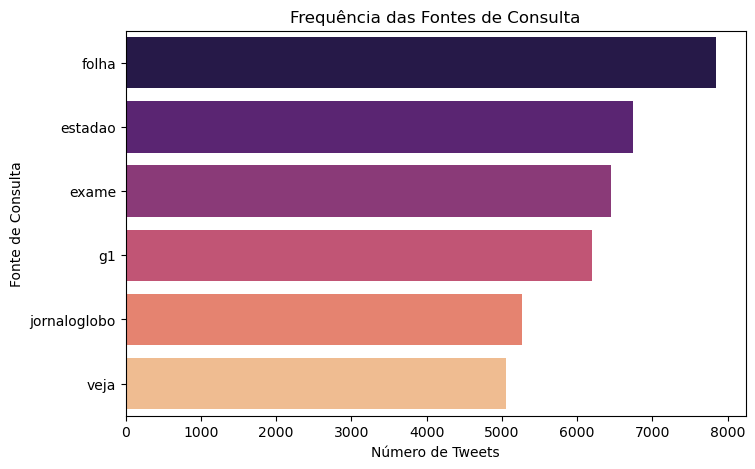

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df["query_used"], order=df["query_used"].value_counts().index, palette="magma")
plt.xlabel("Número de Tweets")
plt.ylabel("Fonte de Consulta")
plt.title("Frequência das Fontes de Consulta")
plt.show()

In [10]:
# Baixar recursos do NLTK
nltk.download("vader_lexicon")

# Carregar modelo do spaCy para PLN
nlp = spacy.load("pt_core_news_sm")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alanf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Usando TextBlob (Tradução Necessária)
O TextBlob funciona melhor em inglês, então traduzimos os tweets antes de analisá-los.

In [11]:
from deep_translator import GoogleTranslator

# Função para traduzir o texto para inglês
def translate_to_english(text):
    try:
        return GoogleTranslator(source="auto", target="en").translate(text)
    except:
        return text  # Retorna o original se houver erro na tradução

# Traduzindo os tweets
df["tweet_translated"] = df["tweet_text"].astype(str).apply(translate_to_english)

# Aplicando TextBlob para análise de sentimento
df["sentiment_textblob"] = df["tweet_translated"].apply(lambda text: TextBlob(text).sentiment.polarity)

# Classificando os sentimentos
df["sentiment_textblob_label"] = df["sentiment_textblob"].apply(lambda x: "Positivo" if x > 0 else "Negativo" if x < 0 else "Neutro")

# Exibir os resultados
df[["tweet_text", "tweet_translated", "sentiment_textblob", "sentiment_textblob_label"]].head()


,tweet_text,tweet_translated,sentiment_textblob,sentiment_textblob_label
0,Esquerda e direita empatam na Suécia; ultranac...,Left and right tie in Sweden; ultranationalist...,0.142857,Positivo
1,Ao vivo: Estadão e TV Gazeta realizam terceiro...,Live: Estadão and TV Gazeta hold third preside...,0.068182,Positivo
2,FOTOS: Apoiadores de Jair Bolsonaro realizam a...,PHOTOS: Jair Bolsonaro supporters hold demonst...,0.000000,Neutro
3,Barroso ameaça barrar propaganda se PT insisti...,Barroso threatens to block propaganda if PT in...,-0.100000,Negativo
4,Serena Williams é multada pelo comportamento d...,Serena Williams fined for behavior during US O...,0.000000,Neutro


## Usando VADER (Apenas para Inglês)

In [12]:
# Inicializar o analisador de sentimentos
sia = SentimentIntensityAnalyzer()

# Aplicar VADER nos tweets traduzidos
df["sentiment_vader"] = df["tweet_translated"].apply(lambda text: sia.polarity_scores(text)["compound"])

# Classificando os sentimentos
df["sentiment_vader_label"] = df["sentiment_vader"].apply(lambda x: "Positivo" if x > 0.05 else "Negativo" if x < -0.05 else "Neutro")

# Exibir os resultados
df[["tweet_text", "tweet_translated", "sentiment_vader", "sentiment_vader_label"]].head()

,tweet_text,tweet_translated,sentiment_vader,sentiment_vader_label
0,Esquerda e direita empatam na Suécia; ultranac...,Left and right tie in Sweden; ultranationalist...,0.0000,Neutro
1,Ao vivo: Estadão e TV Gazeta realizam terceiro...,Live: Estadão and TV Gazeta hold third preside...,0.0000,Neutro
2,FOTOS: Apoiadores de Jair Bolsonaro realizam a...,PHOTOS: Jair Bolsonaro supporters hold demonst...,0.4404,Positivo
3,Barroso ameaça barrar propaganda se PT insisti...,Barroso threatens to block propaganda if PT in...,-0.7579,Negativo
4,Serena Williams é multada pelo comportamento d...,Serena Williams fined for behavior during US O...,0.0000,Neutro


## Usando Naive Bayes Treinado com Scikit-learn

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Separando os dados (X = tweets, y = sentimentos)
X = df["clean_tweet"].astype(str)
y = df["sentiment"]

# Separando os dados de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando um pipeline com TF-IDF + Naive Bayes
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("nb", MultinomialNB())
])

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Fazer previsões
y_pred = pipeline.predict(X_test)

# Avaliação do modelo
print(classification_report(y_test, y_pred))

# Aplicar no dataset completo
df["sentiment_nb"] = pipeline.predict(X)

# Exibir os resultados
df[["tweet_text", "sentiment_nb"]].head()

              precision    recall  f1-score   support

      Neutro       1.00      1.00      1.00      7512

    accuracy                           1.00      7512
   macro avg       1.00      1.00      1.00      7512
weighted avg       1.00      1.00      1.00      7512



,tweet_text,sentiment_nb
0,Esquerda e direita empatam na Suécia; ultranac...,Neutro
1,Ao vivo: Estadão e TV Gazeta realizam terceiro...,Neutro
2,FOTOS: Apoiadores de Jair Bolsonaro realizam a...,Neutro
3,Barroso ameaça barrar propaganda se PT insisti...,Neutro
4,Serena Williams é multada pelo comportamento d...,Neutro


## Conclusão 

O resultado indica que, embora existam outras classes de sentimentos no dataset (Positivo e Negativo), o modelo não conseguiu aprender a diferenciá-las adequadamente. Isso pode ser causado por diversos fatores, como:

1. Desequilíbrio entre as classes, onde a maioria dos tweets é Neutro, fazendo com que o modelo tenda a classificar todas as entradas dessa forma.
2. Problemas no pré-processamento, que podem ter removido informações importantes necessárias para identificar sentimentos distintos.
3. Hiperparâmetros inadequados ou modelo subajustado, limitando a capacidade de aprendizado em detectar padrões de Positivo e Negativo.

Apesar da presença de múltiplas classes, o modelo está classificando todos os tweets como Neutro, resultando em métricas perfeitas apenas para essa classe, mas não refletindo a verdadeira performance do modelo.

## Próximos Passos:

Em um próximo trabalho, vamos:

1. Corrigir o desequilíbrio de classes, aplicando técnicas como oversampling, undersampling ou ajustando pesos das classes no modelo.
2. Revisar o pipeline de pré-processamento, garantindo que as características relevantes para a análise de sentimentos sejam preservadas.
3. Aprimorar o modelo com técnicas mais robustas, como o ajuste de hiperparâmetros e o uso de modelos mais complexos (por exemplo, BERT).
4. Utilizar métricas adicionais como a matriz de confusão e análise individual das classes para garantir uma avaliação mais precisa.

Dessa forma, garantiremos que o modelo consiga capturar melhor as nuances dos diferentes sentimentos presentes no dataset. 🚀